In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# Read in Data
erdb = pd.read_csv('ER Wait Time Dataset.csv')

In [5]:
# Data structures
erdb.info()
erdb.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 19 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   Visit ID                            5000 non-null   object
 1   Patient ID                          5000 non-null   object
 2   Hospital ID                         5000 non-null   object
 3   Hospital Name                       5000 non-null   object
 4   Region                              5000 non-null   object
 5   Visit Date                          5000 non-null   object
 6   Day of Week                         5000 non-null   object
 7   Season                              5000 non-null   object
 8   Time of Day                         5000 non-null   object
 9   Urgency Level                       5000 non-null   object
 10  Nurse-to-Patient Ratio              5000 non-null   int64 
 11  Specialist Availability             5000 non-null   int6

,Visit ID,Patient ID,Hospital ID,Hospital Name,Region,Visit Date,Day of Week,Season,Time of Day,Urgency Level,Nurse-to-Patient Ratio,Specialist Availability,Facility Size (Beds),Time to Registration (min),Time to Triage (min),Time to Medical Professional (min),Total Wait Time (min),Patient Outcome,Patient Satisfaction
0,HOSP-1-20240210-0001,PAT-00001,HOSP-1,Springfield General Hospital,Urban,2024-02-10 20:20:56,Saturday,Winter,Late Morning,Medium,4,3,92,17,22,66,105,Discharged,1
1,HOSP-3-20241128-0001,PAT-00002,HOSP-3,Northside Community Hospital,Rural,2024-11-28 02:07:47,Thursday,Fall,Evening,Medium,4,0,38,9,30,30,69,Discharged,3
2,HOSP-3-20240930-0002,PAT-00003,HOSP-3,Northside Community Hospital,Rural,2024-09-30 04:02:28,Monday,Fall,Evening,Low,5,1,38,38,40,125,203,Discharged,1
3,HOSP-2-20240227-0001,PAT-00004,HOSP-2,Riverside Medical Center,Urban,2024-02-27 00:31:13,Tuesday,Winter,Evening,High,4,5,94,8,16,64,88,Discharged,2
4,HOSP-1-20240306-0002,PAT-00005,HOSP-1,Springfield General Hospital,Urban,2024-03-06 16:52:26,Wednesday,Spring,Afternoon,Low,4,8,74,26,29,63,118,Discharged,1


In [7]:
# CHeck for missing data
erdb.isnull().sum() # No missing data

Visit ID                              0
Patient ID                            0
Hospital ID                           0
Hospital Name                         0
Region                                0
Visit Date                            0
Day of Week                           0
Season                                0
Time of Day                           0
Urgency Level                         0
Nurse-to-Patient Ratio                0
Specialist Availability               0
Facility Size (Beds)                  0
Time to Registration (min)            0
Time to Triage (min)                  0
Time to Medical Professional (min)    0
Total Wait Time (min)                 0
Patient Outcome                       0
Patient Satisfaction                  0
dtype: int64

In [10]:
# Convert Visit Date into datetime format
erdb['Visit Date'] = pd.to_datetime(erdb['Visit Date'])
erdb['Visit Month'] = erdb['Visit Date'].dt.month
erdb['Visit Hour'] = erdb['Visit Date'].dt.hour

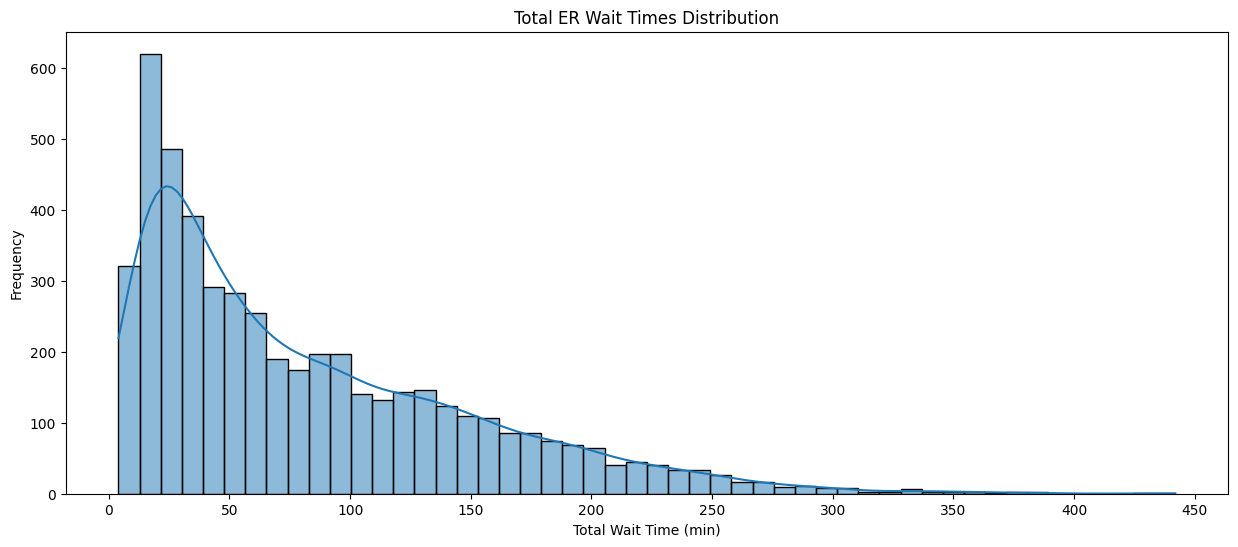

In [91]:
# Graph wait time distribution
plt.figure(figsize=(15, 6))
sns.histplot(erdb['Total Wait Time (min)'], kde=True, bins=50)
plt.title("Total ER Wait Times Distribution")
plt.ylabel("Frequency")
plt.xticks([0, 50, 100, 150, 200, 250, 300, 350, 400, 450])
plt.show()

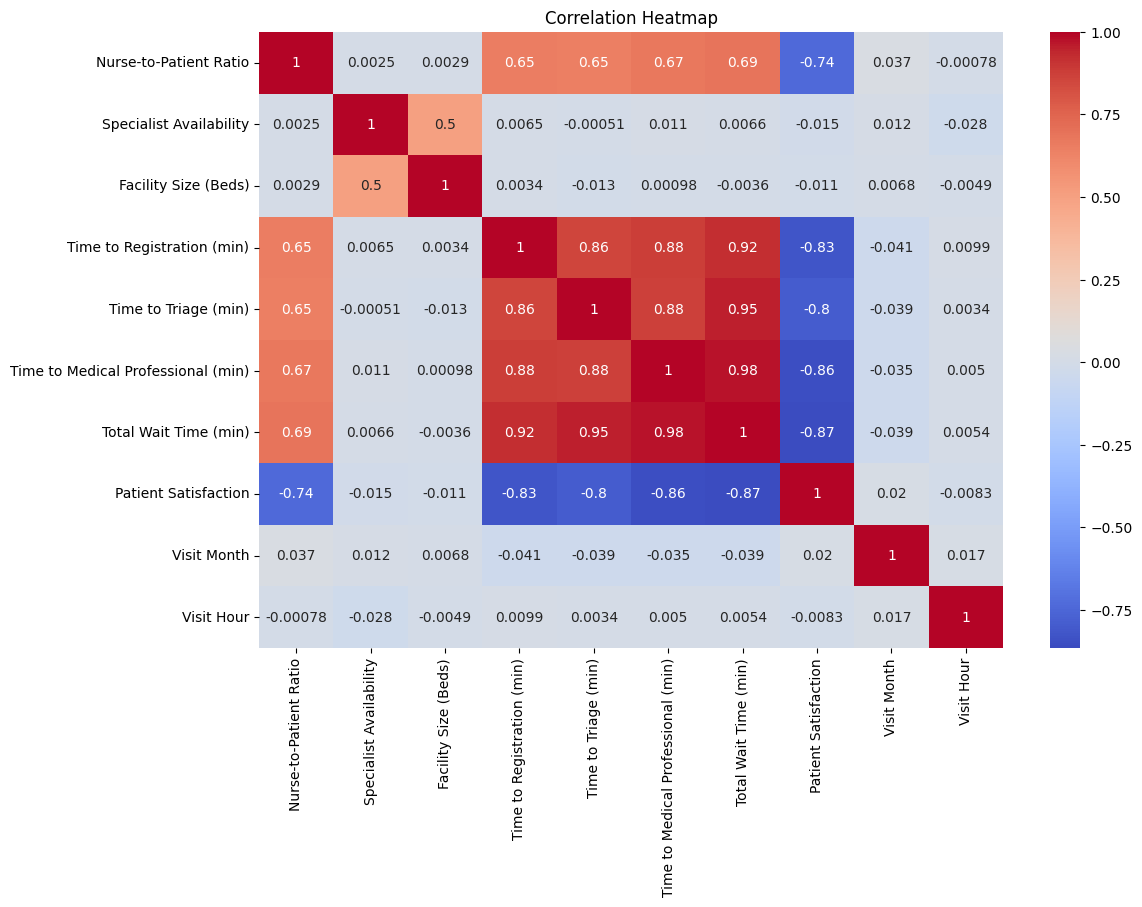

In [55]:
# Correlation heatmap of numerical features
plt.figure(figsize=(12, 8))
corr = erdb.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

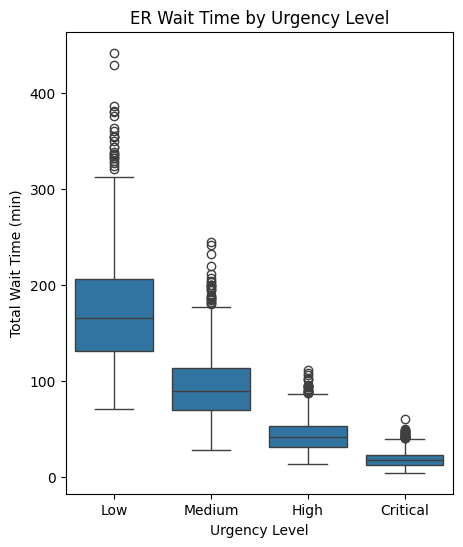

In [68]:
# Wait time by urgency level
plt.figure(figsize=(5, 6))
sns.boxplot(data=erdb, x='Urgency Level', y='Total Wait Time (min)',
            order=["Low", "Medium", "High", "Critical"])
plt.title("ER Wait Time by Urgency Level")
plt.show()

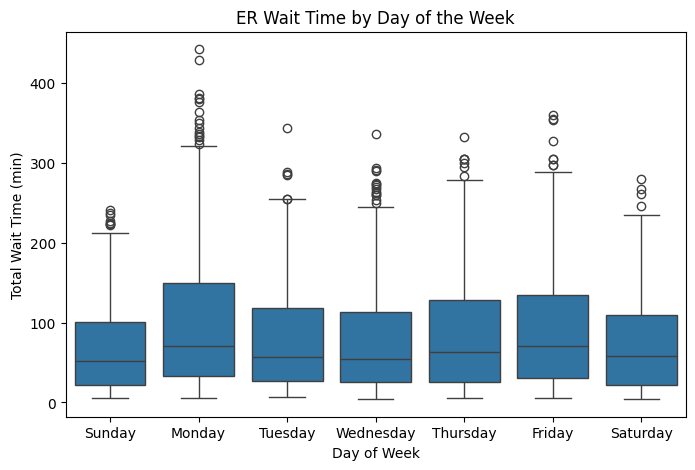

In [97]:
# Average wait time per day of week
plt.figure(figsize=(8, 5))
sns.boxplot(data=erdb, x='Day of Week', y='Total Wait Time (min)',
            order=["Sunday", "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday"])
plt.title("ER Wait Time by Day of the Week")
plt.show()

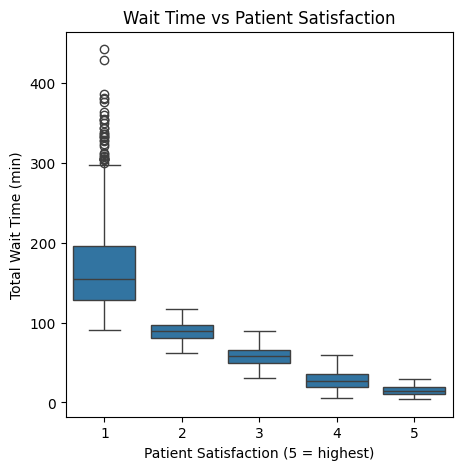

In [82]:
# Wait time vs patient satisfaction
plt.figure(figsize=(5, 5))
sns.boxplot(data=erdb, x='Patient Satisfaction', y='Total Wait Time (min)')
plt.title("Wait Time vs Patient Satisfaction")
plt.xlabel('Patient Satisfaction (5 = highest)')
plt.show()